# Fields and fundamental interactions in physics

In this notebook companion we will program field vector distributions.

This noteboks aim at developping a **practical** sense of the electrostatic/magnetostatic field mapping. Do not give up because the code looks to complex. You are guided by questions that focus mostly on the physics of the lecture on *"Fundamental Interactions"*. This lessons are illustrated by some python code we are going to put hands on.

Remember:

- Make your personnal copy of this document by renaming it.
- Give a proper answer in the markdown cell that immediately follows the questions. Check that the answer number is correct. The mark "**Answer n:**" should never be removed. This is crucial to fetch the corrections. 
- It proves to be necessary to modify the code cells: You need extra testing so do not hesitate to copy pieces of code that you understand. 
- The cells contain variables and these will not be instancianted unless executed one after the other. Do not try to execute the last cell first.
- The code is written with the same structure always, putting the declaration of the constants first on the cell, and the visual display at the end.
- This code has been tested successfully with python 3.6 in early 2021, you may have bugs with certain modules in the future. 

# 1) The Electric monopole

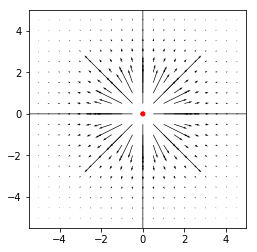

In [44]:
import numpy as np # numerical library 
import matplotlib.pyplot as plt # Visualization with Python
from matplotlib.patches import Circle # To model a point charge

# Next line is to remove an error warning at point (0,0)
np.seterr(divide='ignore', invalid='ignore')


# We start giving data 
# Field of view:
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
U, V = np.meshgrid(X, Y)

# Calulation of the distance between a point M and the place where the charge is
r=(U**2+V**2)**0.5

# Display for vizualisation
fig, ax = plt.subplots()
q = ax.quiver(X, Y, U/r**3, V/r**3)

# Add filled circles for the charges themselves
ax.add_artist(plt.Circle((0, 0), 0.1, color='r'))
ax.set_aspect('equal')
plt.show()

# 2) Magnetic field

## 2.1) The magnetic coil

We first adress a problem of numerical analysis. How much steps do we want ?

In [45]:
import numpy as np

# Constantes
my0=4*np.pi*1e-7;   # Vacuum permeability
I0=-1;              # Curent intensity
                    # le courant circule de gauche a droite

# Dimensions
d=25*1e-3 # Coil's diameter (m)
r=d/2 # Coil's radius (m)
npoint=10 # number of coil nodes for discretization
alpha = 2*np.pi/(npoint-1) # angle discretization

# initialization
x=[i*0 for i in range(npoint)]
y=[r*np.sin(i*alpha) for i in range(npoint)]
z=[-r*np.cos(i*alpha) for i in range(npoint)]


# Definition of positive direction of current using right hand method
# All lenghts are expressed in m

x_spire=np.array([x]);
y_spire=np.array([y]);
z_spire=np.array([z]);

#### Question 1:

Which is the name of the variable which later will be used to define the number of segments ?


How much nodes should be considered ? Find the loop condition where this is clearly stated.

**Answer 1:**

Write your answer instead 

#### Question 2:

If we had stated:

~~~python 
nseg=10
~~~ 

At this point the discretization will consider no curves nor circles but only polygons with a finite (opposed to infinite) number of segments. The less the number of segments the worse the definition of the coils will be. 

Give a reason below not to increase exagerately the number of discrete elements.

**Answer 2:**

Write your answer instead 

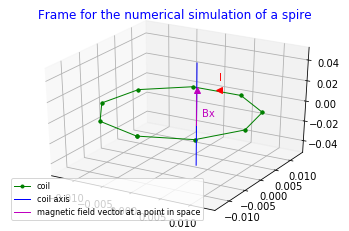

In [46]:

#%%%%%%%%%%%%%%%    3D display of the coil   %%%%%%%%%%%%%%%%#


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax = fig.gca(projection='3d')

# Title of the graph
plt.title ('Frame for the numerical simulation of a spire', color='b')
            

# Coil
plt.plot(y_spire [0], z_spire[0],  'g.-',  linewidth=1, label='coil')
plt.plot(y_spire, z_spire,  'g.',  linewidth=1)

# Magnetic component Bx
plt.plot(([0.003,0.003]),([0,0]),([-.05,0.05]), 'b-',label='coil axis',linewidth=1)
plt.plot(([0.003,0.003]),([0,0]),([-.01,0.02]), 'm-',label='magnetic field vector at a point in space',linewidth=1)
plt.plot([0.003],[0],[0.025], 'm', marker='^', linewidth=2)
ax.text(0.004,0,0,'Bx', color='m')

#curent
plt.plot([0],[0.0125],[0], 'r', marker='<')
ax.text(0,0.0125,0.01,'I', color='r')

#graphs legend 
plt.legend (loc='lower left', prop={'size':8})

plt.show()

#### Question 3
Watch carefully the position (M) where the magnetic field is displatey:
~~~python 
plt.plot(([0.003,0.003]),([0,0]),([-.05,0.05]), 'b-',label='coil axis',linewidth=1)
~~~ 
at this point is, the field orientation correct ? Write a code that would place the $Bx$ at the correct possition. 

**Answer 3:**

Write your answer here and deliver your code in the next cell

## 2.2) The field mapping of B

Now we are going to numericaly calculate the distribution of a certain number of magnetic vectors. This part follows the first one.

In [47]:
#%%%%%%%%%% Magnetic field calculations in a ex, ey plabe
# The coils main axis is oriented towards ey


ndp=50 # Number of points

# x range
xmin,xmax=-0.05,0.05

# y range
ymin, ymax=-0.05, 0.05

# limites z
zmin, zmax=-0.05,0.05

dx=(xmax-xmin)/(ndp-1) #increment x
dy=(ymax-ymin)/(ndp-1) # increment y
dz=(zmax-zmin)/(ndp-1) # increment z

#%%%%%%%%%%%%%%%        Magnetostatic    %%%%%%%%%%%%%%%%%%%%%%%%%%%#

bxf=np.zeros(ndp)  # 
byf=np.zeros(ndp)  # 
bzf=np.zeros(ndp)  # 

I0f1=my0*I0/(4*np.pi) 


bfx,bfy,bfz=0,0,0

nseg=np.size(z_spire)-1

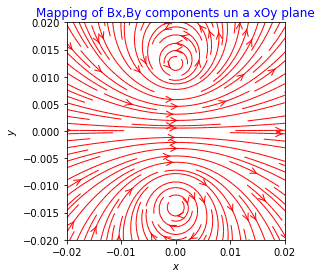

In [48]:
#magnetic field vectors at differents points of a plane xOy


#initialisation du champ magnétique bx1
bx1=0
by1=0
#Initialisation de l energie
Em=0
Emf=0

#Indice pour les listes
l=0

#ndp-1 intervalles
ndp1=41

#### pour verification de Bx sur l'axe Ox avec yM,zM=0,0
##BD seul cas ou la comparaison analytique est possible
####

#initialisation des listes des coordonnees des points
s = (ndp1,ndp1)

xM1f=np.zeros(s)
yM1f=np.zeros(s)
#zM1f=np.zeros(ndp1*ndp1)
u = np.zeros(s)
X = np.zeros(s)
Y = np.zeros(s)

#initialisation de la liste des valeurs de la composante Bx1 en chaque point
bx1f=np.zeros(s)
#initialisation de la liste des valeurs de la composante By1 en chaque point 
by1f=np.zeros(s)
#initialisation de la liste des valeurs de la composante By1 en chaque point 
bz1f=np.zeros(s)

#calcul exact du coefficient b0 de l'integrale servant a calculer Bx
#selon la formule: b0=mu0*I0*r/(2*pi)
b0=2*10**(-7)*I0*r

#coordonnees des points
xM1f = np.linspace(-.03,.03,ndp1)
yM1f = np.linspace(-.03,.03,ndp1)

(X,Y) = np.meshgrid(xM1f,yM1f)

#calcul de Bx1 en des points regulierement espaces du plan xoy autour de la spire
##BD Physiquement ce calcul doit s'appuyer sur un modele numerique car l'equation analytique est injustifiable des que l'on est excentre
#Initialisation des positions

xM, yM,zM=0,0,0

for i in range(ndp1):
          
    #Initialization
    bfx,bfy,bfz=0,0,0
    
    
    for j in range(ndp1):
        
        xM=X[i][j]
        yM=Y[i][j]
        
         
        bfx,bfy,bfz=0,0,0
    
        R=np.array([xM,yM,zM])
        for wseg in range(nseg):
            xs=x_spire[0][wseg]
            ys=y_spire[0][wseg]
            zs=z_spire[0][wseg]
        
            Rs=np.array([xs, ys, zs])
        
            drsx=(x_spire[0][wseg+1]-x_spire[0][wseg])
            drsy=(y_spire[0][wseg+1]-y_spire[0][wseg])
            drsz=(z_spire[0][wseg+1]-z_spire[0][wseg])
    
            drs=np.array([drsx, drsy, drsz])
        
            Delta_R= Rs - R
 
            Delta_Rdist=np.sqrt(Delta_R[0]**2+Delta_R[1]**2+Delta_R[2]**2)
        
            Delta_Rdis3=Delta_Rdist**3
        
            b2=1.0/Delta_Rdis3
            b12=I0f1*b2*(-1)
        
            #
            Delta_Rxdrs_x=Delta_R[1]*drsz-Delta_R[2]*drsy
            Delta_Rxdrs_y=Delta_R[2]*drsx-Delta_R[0]*drsz
            Delta_Rxdrs_z=Delta_R[0]*drsy-Delta_R[1]*drsx
        
            #
            bfx=bfx+b12*Delta_Rxdrs_x
            bfy=bfy+b12*Delta_Rxdrs_y
            bfz=bfz+b12*Delta_Rxdrs_z
            
        bx1f[i][j]+=bfx
        by1f[i][j]+=bfy
        bz1f[i][j]+=bfz
        


        
# Ploting

#q = plt.quiver(X,Y,bx1f,by1f,color='r')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.streamplot(X,Y,bx1f,by1f,color='r', linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
plt.title ('Mapping of Bx,By components un a xOy plane',color='b')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-0.02,0.02)
ax.set_ylim(-0.02,0.02)
ax.set_aspect('equal')

plt.show()

#### Question 4:

Could you predict the limit where the analytical results match the numerical ones within the limit of 95% (only 5% discrepancy between the analyticaly calculated field at a central position and the numerical calculated value). This requires finding an analytical formula for the field produced at the green point (corresponding to the center) by single turn coils.

**Answer 4:**

Write your answer instead, please use LaTex syntax to write the formula for the component $\overrightarrow{B}(M).\overrightarrow{e_x}$ 

### Visualisation hints

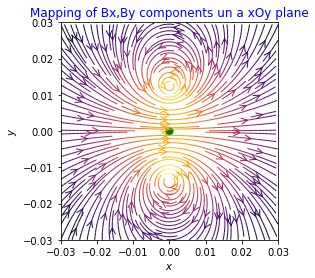

In [49]:
color = 2 * np.log(np.hypot(bx1f, by1f))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.streamplot(X,Y,bx1f,by1f,color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
plt.title ('Mapping of Bx,By components un a xOy plane',color='b')


ax.add_artist(plt.Circle((0, 0), 0.001, color='g'))
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-0.03,0.03)
ax.set_ylim(-0.03,0.03)
ax.set_aspect('equal')

plt.show()

#### Question 5

Is there any chance to find magnetic point charges ? Justify.

**Answer 5:**

Write your answer instead 

#### Question  6
For convenience the examples here are mostly 2D, consider that 3D is also possible. Will it be required ? Justify using symmetry considerations.

**Answer 6:**

Write your answer instead 